In [2]:
import pandas as pd
df = pd.read_excel("/content/Walmart Sales.xlsx")

In [3]:
df.tail()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Date,Time,Payment,Rating
995,233-67-5758,A,Naypyitaw,Normal,Male,Health and beauty,40.35,1,1/29/2019,13:46:00,Ewallet,6.2
996,303-96-2227,A,Mandalay,Normal,Female,Home and lifestyle,97.38,10,3/2/2019,17:16:00,Ewallet,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,2/9/2019,13:22:00,Cash,7.7
998,347-56-2442,B,Yangon,Normal,Male,Home and lifestyle,65.82,1,2/22/2019,15:33:00,Cash,4.1
999,849-09-3807,C,Yangon,Member,Female,Fashion accessories,88.34,7,2/18/2019,13:28:00,Cash,6.6


#Cleaning the Dataset

In [4]:
#Finding Missing Values in all of the columns
missing_values = df.isna().sum()
print(missing_values)

Invoice ID       0
Branch           0
City             0
Customer type    0
Gender           0
Product line     0
Unit price       0
Quantity         0
Date             0
Time             0
Payment          0
Rating           0
dtype: int64


##Since the Dataset has no missing values, we'll move on task at hand

##Tasks->
###A. Analyze the performance of sales and revenue at the city and branch level

In [5]:
#Number of cities
pd.unique(df['City'])

array(['Yangon', 'Naypyitaw', 'Mandalay'], dtype=object)

####Total Revenue per City


In [6]:
df['Total Bill'] = df['Unit price'] * df['Quantity']

Revenue per CITY =>

Yangon :  101143.21 

Naypyitaw :  105303.53 

Mandalay :  101140.64 



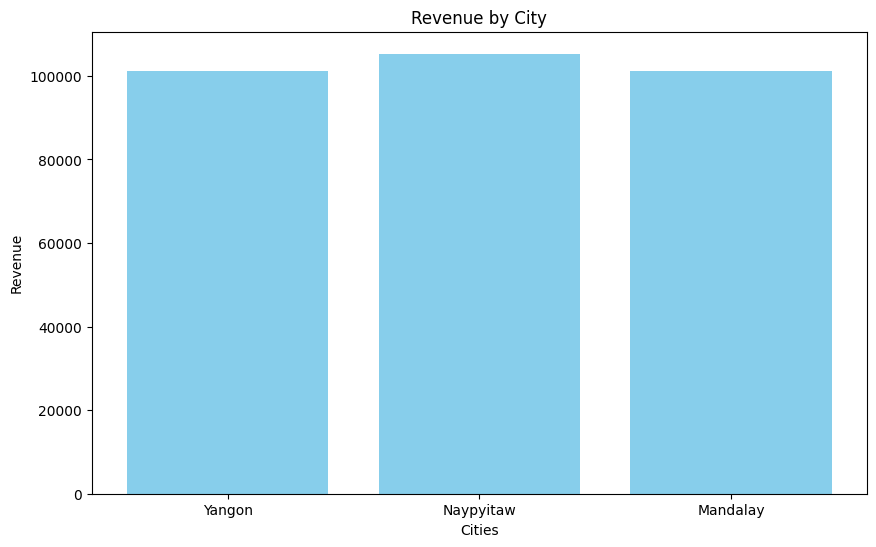

In [7]:
#@title Plotting revenue per city
import matplotlib.pyplot as plt

revenue_per_city = []
cities = ["Yangon", "Naypyitaw", "Mandalay"]

print("Revenue per CITY =>\n")

for city in cities:
  tot_revenue = df.query(f"City == '{city}'")["Total Bill"].sum()
  print(f"{city} : ", round(tot_revenue, 2), "\n")
  revenue_per_city.append(tot_revenue)



plt.figure(figsize=(10, 6))
plt.bar(cities, revenue_per_city, color='skyblue')

plt.xlabel('Cities')
plt.ylabel('Revenue')
plt.title('Revenue by City')

plt.show()

Revenue per BRANCH =>

Yangon - Branch_A:  33647.27 

Yangon - Branch_B:  35193.51 

Yangon - Branch_C:  32302.43 

Naypyitaw - Branch_A:  35985.64 

Naypyitaw - Branch_B:  35157.75 

Naypyitaw - Branch_C:  34160.14 

Mandalay - Branch_A:  34130.09 

Mandalay - Branch_B:  37215.93 

Mandalay - Branch_C:  29794.62 



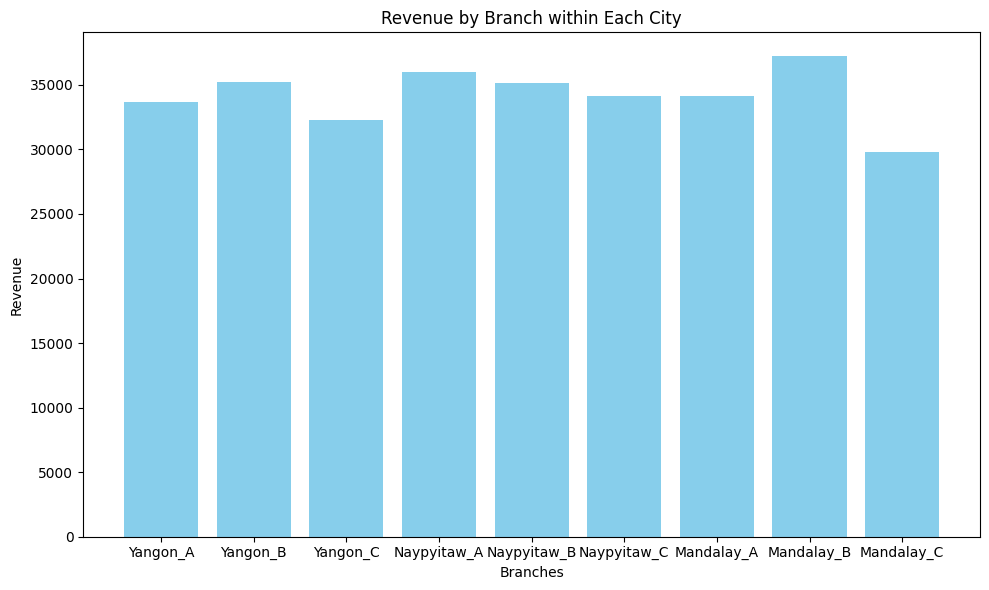

In [8]:
#@title Plotting Revenue Per Branch

branch_wise_revenue = []

branches = ['A', 'B', 'C']
print("Revenue per BRANCH =>\n")

for city in cities:
    for branch in branches:
        total_revenue = df.query(f"City == '{city}' & Branch == '{branch}'")["Total Bill"].sum()
        print(f"{city} - Branch_{branch}: " , round(total_revenue, 2) , "\n")

        branch_wise_revenue.append(total_revenue)

tot_branches = ["Yangon_A", "Yangon_B", "Yangon_C", "Naypyitaw_A", "Naypyitaw_B", "Naypyitaw_C", "Mandalay_A", "Mandalay_B", "Mandalay_C"]

plt.figure(figsize=(10, 6))
plt.bar(tot_branches, branch_wise_revenue, color='skyblue')

# Labels
plt.xlabel('Branches')
plt.ylabel('Revenue')
plt.title('Revenue by Branch within Each City')

# Plotting
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


Sales per BRANCH =>

Yangon - Branch_A:  598 

Yangon - Branch_B:  631 

Yangon - Branch_C:  630 

Naypyitaw - Branch_A:  648 

Naypyitaw - Branch_B:  604 

Naypyitaw - Branch_C:  579 

Mandalay - Branch_A:  637 

Mandalay - Branch_B:  664 

Mandalay - Branch_C:  519 



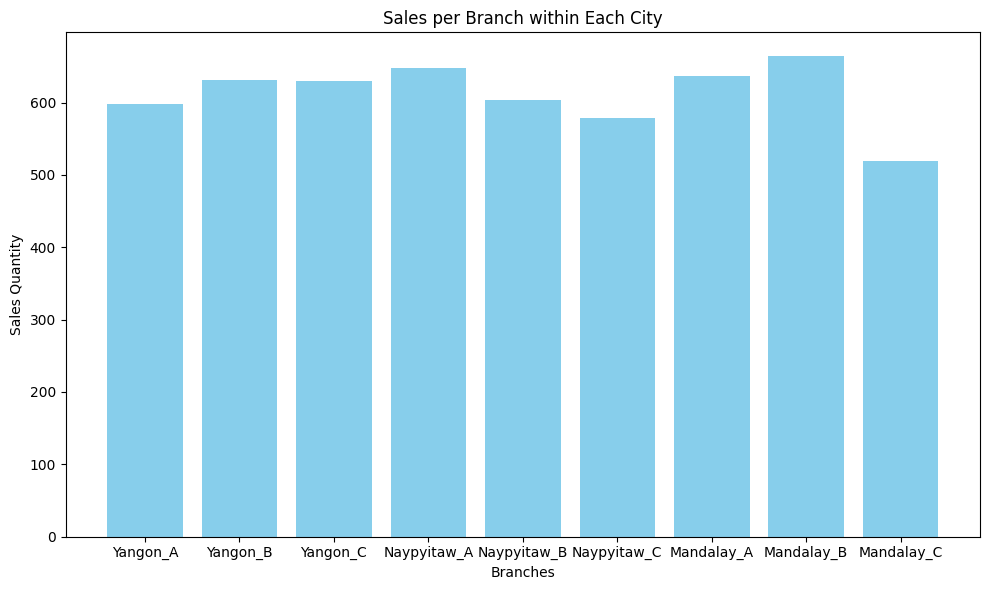

In [9]:
#@title Plotting Quantity sales per branch

quantity_sales_per_branch = []
print("Sales per BRANCH =>\n")

for city in cities:
  for branch in branches:
    qty = df.query(f"City == '{city}' & Branch == '{branch}'")["Quantity"].sum()
    print(f"{city} - Branch_{branch}: " , qty , "\n")

    quantity_sales_per_branch.append(qty)

plt.figure(figsize=(10, 6))
plt.bar(tot_branches, quantity_sales_per_branch, color='skyblue')

# Labels
plt.xlabel('Branches')
plt.ylabel('Sales Quantity')
plt.title('Sales per Branch within Each City')

# Plotting
plt.tight_layout()
plt.show()



Sales per CITY =>

Yangon :  1859 

Naypyitaw :  1831 

Mandalay :  1820 



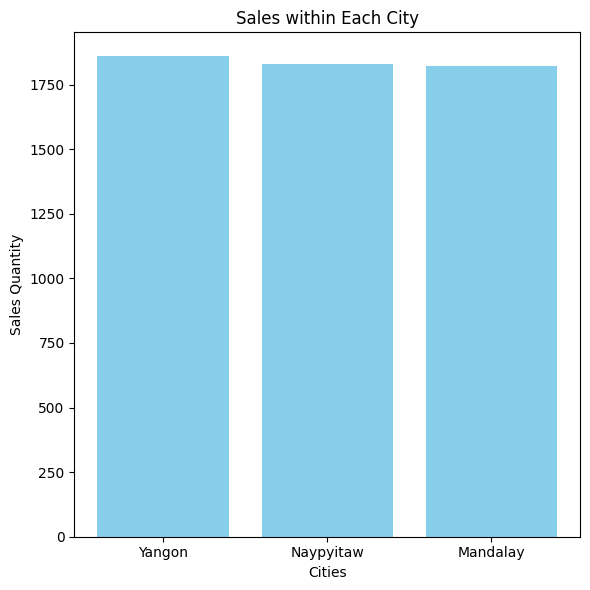

In [10]:
quantity_sales_per_city = []

print("Sales per CITY =>\n")
for city in cities:
  qty = df.query(f"City == '{city}'" )["Quantity"].sum()
  print(f"{city} : " , qty , "\n")
  quantity_sales_per_city.append(qty)

plt.figure(figsize = (6,6))
plt.bar(cities, quantity_sales_per_city,  color='skyblue')

# Labels
plt.xlabel('Cities')
plt.ylabel('Sales Quantity')
plt.title('Sales within Each City')

# Plotting
plt.tight_layout()
plt.show()




##With Task A completed, we move on to Task B ->
### B. What is the average price of an item sold at each branch of the city

Average Price of An Item at Each branch ->
Yangon_A :  56.27 

Yangon_B :  55.77 

Yangon_C :  51.27 

Naypyitaw_A :  55.53 

Naypyitaw_B :  58.21 

Naypyitaw_C :  59.0 

Mandalay_A :  53.58 

Mandalay_B :  56.05 

Mandalay_C :  57.41 



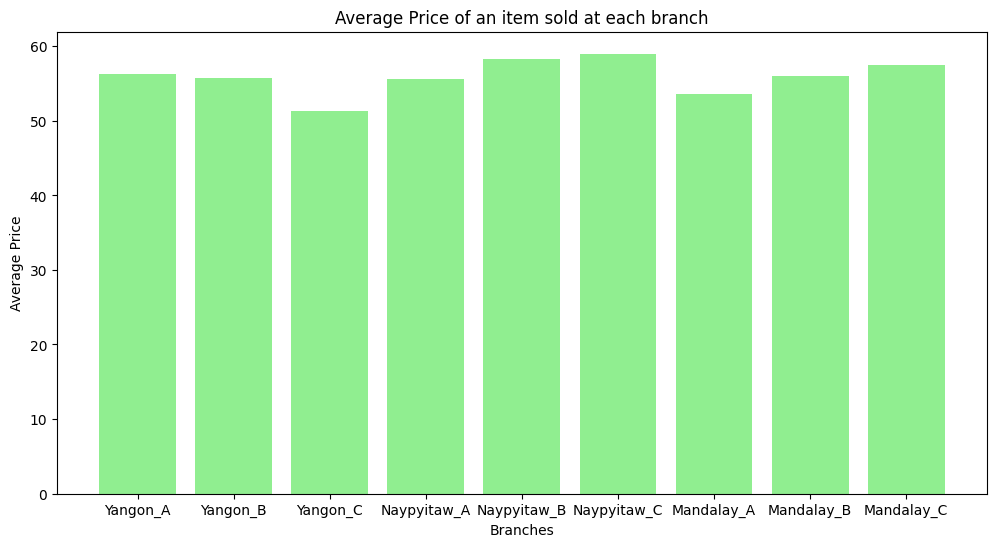

In [11]:
#We're going to make use of lists already storing the revenue and the quantity per branch in the previous task

avg_price_per_branch = []
print("Average Price of An Item at Each branch ->")
for i in range (0,9):
  avg_price_per_branch.append(branch_wise_revenue[i]/quantity_sales_per_branch[i])
  print(f"{tot_branches[i]} : ",  round(avg_price_per_branch[i], 2), "\n")


plt.figure(figsize = (12,6))
plt.bar(tot_branches,avg_price_per_branch, color = "lightgreen" )

plt.xlabel('Branches')
plt.ylabel('Average Price')
plt.title('Average Price of an item sold at each branch')

plt.show()


##Now Since Task B is Done, We Move on to Task C->
### Analyze the performance of sales and revenue, Month over Month across the Product line, Gender, and Payment Method, and identify the focus areas to get better sales for April 2019.

In [12]:
#To analyse our data month by month, we need to make use of pandas datetime functions
df.head()
#Our date is in MM/DD/YYY format, all from the year 2019

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Date,Time,Payment,Rating,Total Bill
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,1/5/2019,13:08:00,Ewallet,9.1,522.83
1,226-31-3081,A,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3/8/2019,10:29:00,Cash,9.6,76.40
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,3/3/2019,13:23:00,Credit card,7.4,324.31
3,123-19-1176,B,Yangon,Member,Male,Health and beauty,58.22,8,1/27/2019,20:33:00,Ewallet,8.4,465.76
4,373-73-7910,C,Yangon,Normal,Male,Sports and travel,86.31,7,2/8/2019,10:37:00,Ewallet,5.3,604.17


In [13]:
df['N_Date'] = pd.to_datetime(df["Date"], format = "%m/%d/%Y")
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Date,Time,Payment,Rating,Total Bill,N_Date
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,1/5/2019,13:08:00,Ewallet,9.1,522.83,2019-01-05
1,226-31-3081,A,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3/8/2019,10:29:00,Cash,9.6,76.40,2019-03-08
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,3/3/2019,13:23:00,Credit card,7.4,324.31,2019-03-03
3,123-19-1176,B,Yangon,Member,Male,Health and beauty,58.22,8,1/27/2019,20:33:00,Ewallet,8.4,465.76,2019-01-27
4,373-73-7910,C,Yangon,Normal,Male,Sports and travel,86.31,7,2/8/2019,10:37:00,Ewallet,5.3,604.17,2019-02-08


In [14]:
#Now we extract month from the N_Date

df['Month'] = df['N_Date'].dt.month

#Drop column N_date we dont need it anymore
del df['N_Date']
df.head()



,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Date,Time,Payment,Rating,Total Bill,Month
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,1/5/2019,13:08:00,Ewallet,9.1,522.83,1
1,226-31-3081,A,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3/8/2019,10:29:00,Cash,9.6,76.40,3
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,3/3/2019,13:23:00,Credit card,7.4,324.31,3
3,123-19-1176,B,Yangon,Member,Male,Health and beauty,58.22,8,1/27/2019,20:33:00,Ewallet,8.4,465.76,1
4,373-73-7910,C,Yangon,Normal,Male,Sports and travel,86.31,7,2/8/2019,10:37:00,Ewallet,5.3,604.17,2


For The Month of January
 Yangon - A : 10136.71
 Yangon - B : 14968.66
 Yangon - C : 11733.8
 Naypyitaw - A : 14530.73
 Naypyitaw - B : 12366.41
 Naypyitaw - C : 11612.08
 Mandalay - A : 13611.34
 Mandalay - B : 12635.9
 Mandalay - C : 9158.53


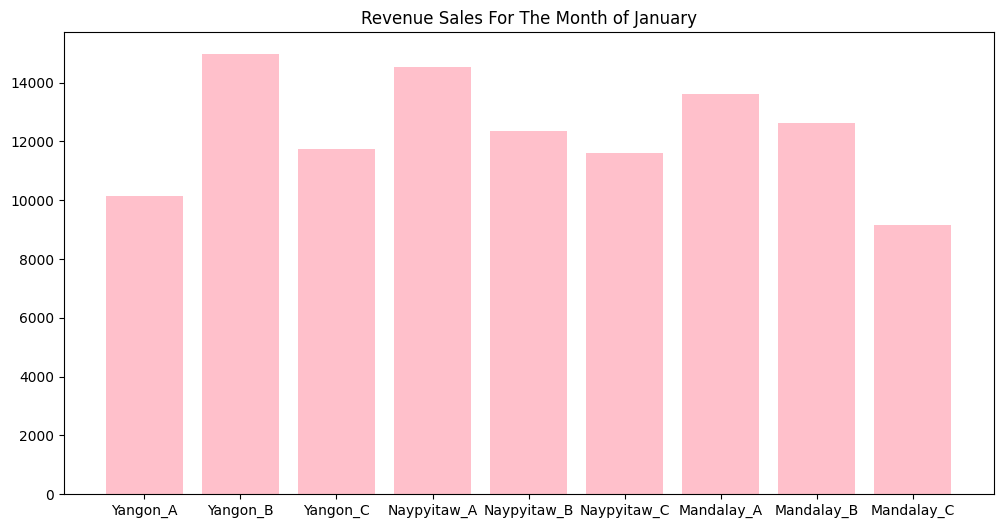



For The Month of Feburary
 Yangon - A : 10174.43
 Yangon - B : 7903.69
 Yangon - C : 10360.09
 Naypyitaw - A : 9060.08
 Naypyitaw - B : 12210.41
 Naypyitaw - C : 10096.16
 Mandalay - A : 10771.33
 Mandalay - B : 15068.68
 Mandalay - C : 6945.01


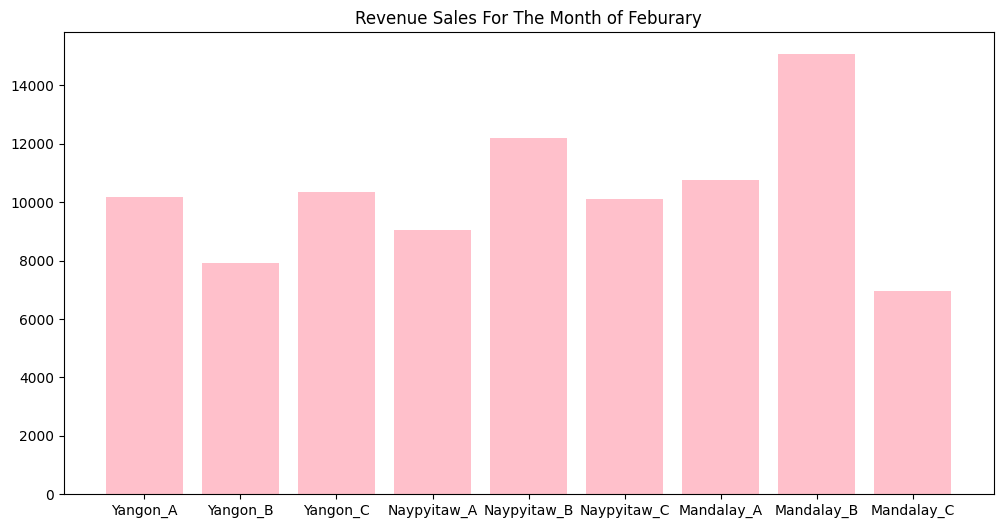



For The Month of March
 Yangon - A : 13336.13
 Yangon - B : 12321.16
 Yangon - C : 10208.54
 Naypyitaw - A : 12394.83
 Naypyitaw - B : 10580.93
 Naypyitaw - C : 12451.9
 Mandalay - A : 9747.42
 Mandalay - B : 9511.35
 Mandalay - C : 13691.08


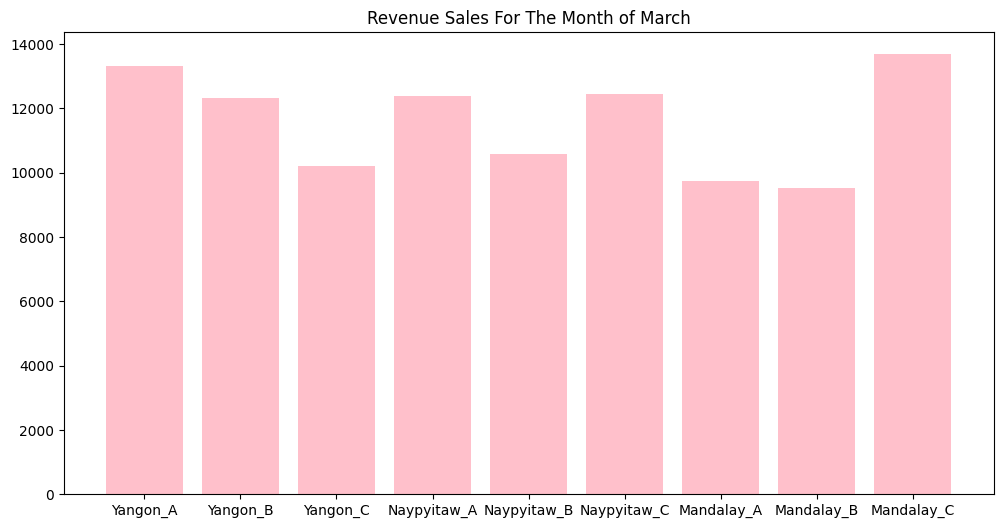

In [15]:
#@title Now Analyzing month over month sales
total_monthly_sales = []
months = ["January", "Feburary", "March"]
#Since the data is upto March so ->
for i in range (1,4):
  print(f"For The Month of {months[i-1]}")
  for city in cities:
    for branch in branches:
      monthly_sale_per_branch = df.query(f"Month == {i} & City == '{city}' & Branch == '{branch}' " )["Total Bill"].sum()
      total_monthly_sales.append(monthly_sale_per_branch)
      print( f" {city} - {branch} :", round(monthly_sale_per_branch, 2))

  plt.figure(figsize = (12,6))
  plt.bar(tot_branches, total_monthly_sales, color = 'Pink')
  plt.title(f"Revenue Sales For The Month of {months[i-1]}")
  plt.show()
  total_monthly_sales.clear()
  print("\n")



By looking at the above Graphs, we can see that
1.  Mandalay is the most unreliable city out of all, with revenue numbers very high as well as very low.
2.  The revenue numbers for the month of Feburary are comparitively low in comparision to Jan and March.



7.0667
6.9982
7.0159
7.0736
7.1349
7.0101
6.716
6.9653
6.7632


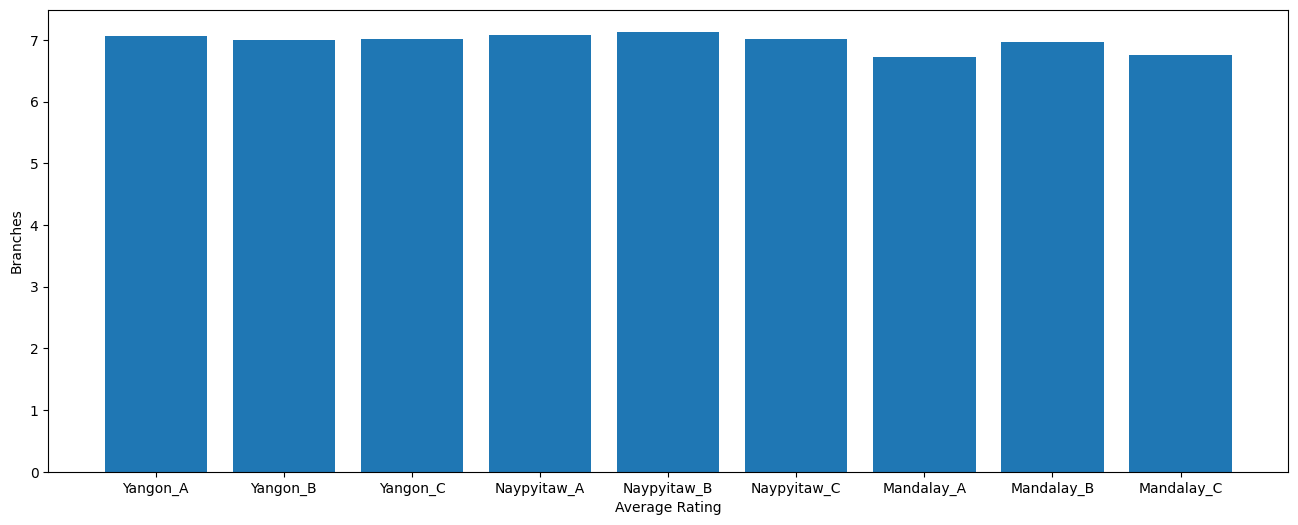

In [16]:
#Calculating Ratings per branch
ratings = []

for city in cities:
  for branch in branches:
    avg_rating = (df.query(f"City == '{city}' & Branch == '{branch}' ")['Rating'].sum())/ (df.query(f"City == '{city}' & Branch == '{branch}' ").shape[0]);
    print(round(avg_rating,4))
    ratings.append(avg_rating)

plt.figure(figsize = (16,6))
plt.bar(tot_branches, ratings)
plt.xlabel("Average Rating")
plt.ylabel("Branches")
plt.show()


Ratings are pretty standard near about 7 for all the branches.

In [17]:
#@title Now analyzing Gender and Payment Methods.

male_customers = df.query("Gender == 'Male'")
print(len(male_customers))
female_customers = df.query("Gender == 'Female'")
print(len(female_customers))


499
501


Pretty even numbers for Both the Genders

In [18]:
#@title Payment Methods

pd.unique(df['Payment'])

array(['Ewallet', 'Cash', 'Credit card'], dtype=object)

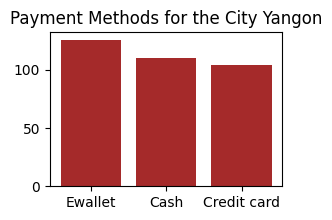

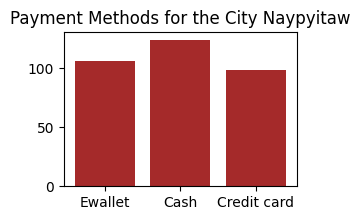

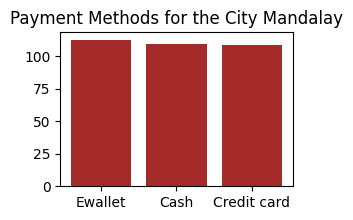

In [19]:
payment_methods = ['Ewallet', 'Cash', 'Credit card']
count_payment = []
for city in cities:
    for p in payment_methods:
      count_payment.append(len(df.query(f"Payment == '{p}' & City == '{city}'")))
    plt.figure(figsize = (3, 2))

    plt.bar(payment_methods, count_payment, color = 'Brown')
    plt.title(f"Payment Methods for the City {city}")
    plt.show()
    count_payment.clear()


